# AI Applications Assignment
# Team
# Yashpal 101803611 COE-27
# Shreya Gupta 101803595 COE-27
# Harsh Kiran Garg 101803605 COE-27

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [5]:
train.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
train['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

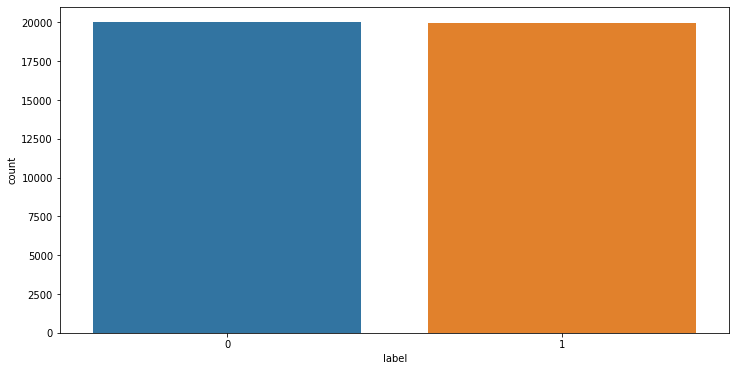

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=train)

In [8]:
train['word_count']=train['text'].str.lower().str.len()
train

,text,label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,"When I first watched Flatliners, I was amazed....",1,1045


Text(0.5, 1.0, 'No of Word')

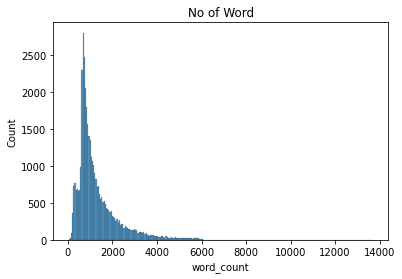

In [9]:
sns.histplot(data=train, x="word_count").set_title('No of Word')

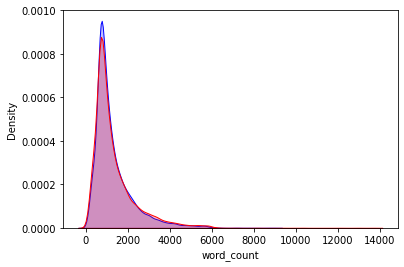

In [10]:
pos_count =  train['word_count'][train['label']==0]
pos_plot = sns.kdeplot(pos_count,color='b',shade=True)
neg_count = train['word_count'][train['label']==1]
neg_plot = sns.kdeplot(neg_count,color='r',shade=True)


In [11]:
def preprocess(data):
    stop = stopwords.words('english')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~'''
    data['text'] = data['text'].str.lower()
    data['text'] = data['text'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    data['text'] = data['text'].str.translate(str.maketrans('', '', punct))
    data['word_count'] = data['text'].str.split().str.len()
    return data
train = preprocess(train)
train.head()

,text,label,word_count
0,grew b. 1965 watching loving thunderbirds. mat...,0,87
1,put movie dvd player sat coke chips expectatio...,0,162
2,people know particular time past like feel nee...,0,99
3,even though great interest biblical movies bor...,0,33
4,im die hard dads army fan nothing ever change ...,1,109


In [12]:
def pos_tag(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag,wordnet.NOUN)

In [13]:
def lemmatize(data):
    lemmatizer=WordNetLemmatizer()
    data['text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w,pos_tag(w)) for w in word_tokenize(x)]))
    return data


In [14]:
train = lemmatize(train)
train

,text,label,word_count
0,grow b . 1965 watch love thunderbird . mate sc...,0,87
1,put movie dvd player sat coke chip expectation...,0,162
2,people know particular time past like feel nee...,0,99
3,even though great interest biblical movie bore...,0,33
4,im die hard dad army fan nothing ever change t...,1,109
...,...,...,...
39995,western union something forgotten classic west...,1,300
39996,movie incredible piece work . explores every n...,1,28
39997,wife watch movie plan visit sicily stromboli s...,0,105
39998,first watch flatliners amaze . necessary featu...,1,96


In [15]:
train['text'][0]

'grow b . 1965 watch love thunderbird . mate school watch . played thunderbird school lunch school . want virgil scott . one want alan . counting 5 become art form . take child see movie hop would get glimpse love child . bitterly disappoint . high point snappy theme tune . could compare original score thunderbird . thankfully early saturday morning one television channel still play rerun series gerry anderson wife create . jonatha frakes hand director chair version completely hopeless . waste film . utter rubbish . cgi remake may acceptable replace marionette homo sapiens subsp . sapiens huge error judgment .'

In [16]:
#get postive and negative sentiment records for wordcloud
positive = train['text'][train['label']==1]
negative = train['text'][train['label']==0]
stop = set(stopwords.words('english'))
stop.update(["br", "href","film","movie","one"])
print(stop)
#negative
## Wordcloud
pos_wordcloud = WordCloud(stopwords=stop).generate(' '.join(positive))
neg_wordcloud = WordCloud(stopwords=stop).generate(' '.join(negative))

{'with', 'when', 'don', 'just', 'href', 'ourselves', "hasn't", 'all', 're', 'above', "you've", 'where', 'been', 'because', 'll', 'aren', 'most', 'movie', 'but', 'now', 'film', 'up', 'in', 'yourselves', 'you', 'against', 'of', 'hasn', 'same', 'more', 'too', "don't", 'if', 'a', 'ours', 'mustn', 'is', 'couldn', "isn't", 'were', 'off', "she's", 'as', 'me', 'she', 'whom', 'ain', 'doing', 'at', 'own', 'he', 'herself', 've', "it's", "wouldn't", 'will', 'so', 'once', "mightn't", 'any', 'each', 'had', 'no', 'this', 'our', 'was', 'i', 'again', 'what', "you'd", 'by', 'isn', 'few', "wasn't", 'only', "hadn't", 'through', 'we', 'why', 'the', 'such', 'how', 'weren', 'did', 'y', 'can', 'here', 'ma', 's', "you're", "needn't", 'hadn', 'won', 'those', 'on', 'these', 'him', 'who', "haven't", 'your', "shan't", 'before', 'under', 'while', 'hers', 'that', 'my', 'into', 'an', 'from', 'over', 'doesn', 'between', 'do', 'other', 'or', 'themselves', 'should', 'out', 'shan', "weren't", 'd', 'having', "shouldn't", 

In [17]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)

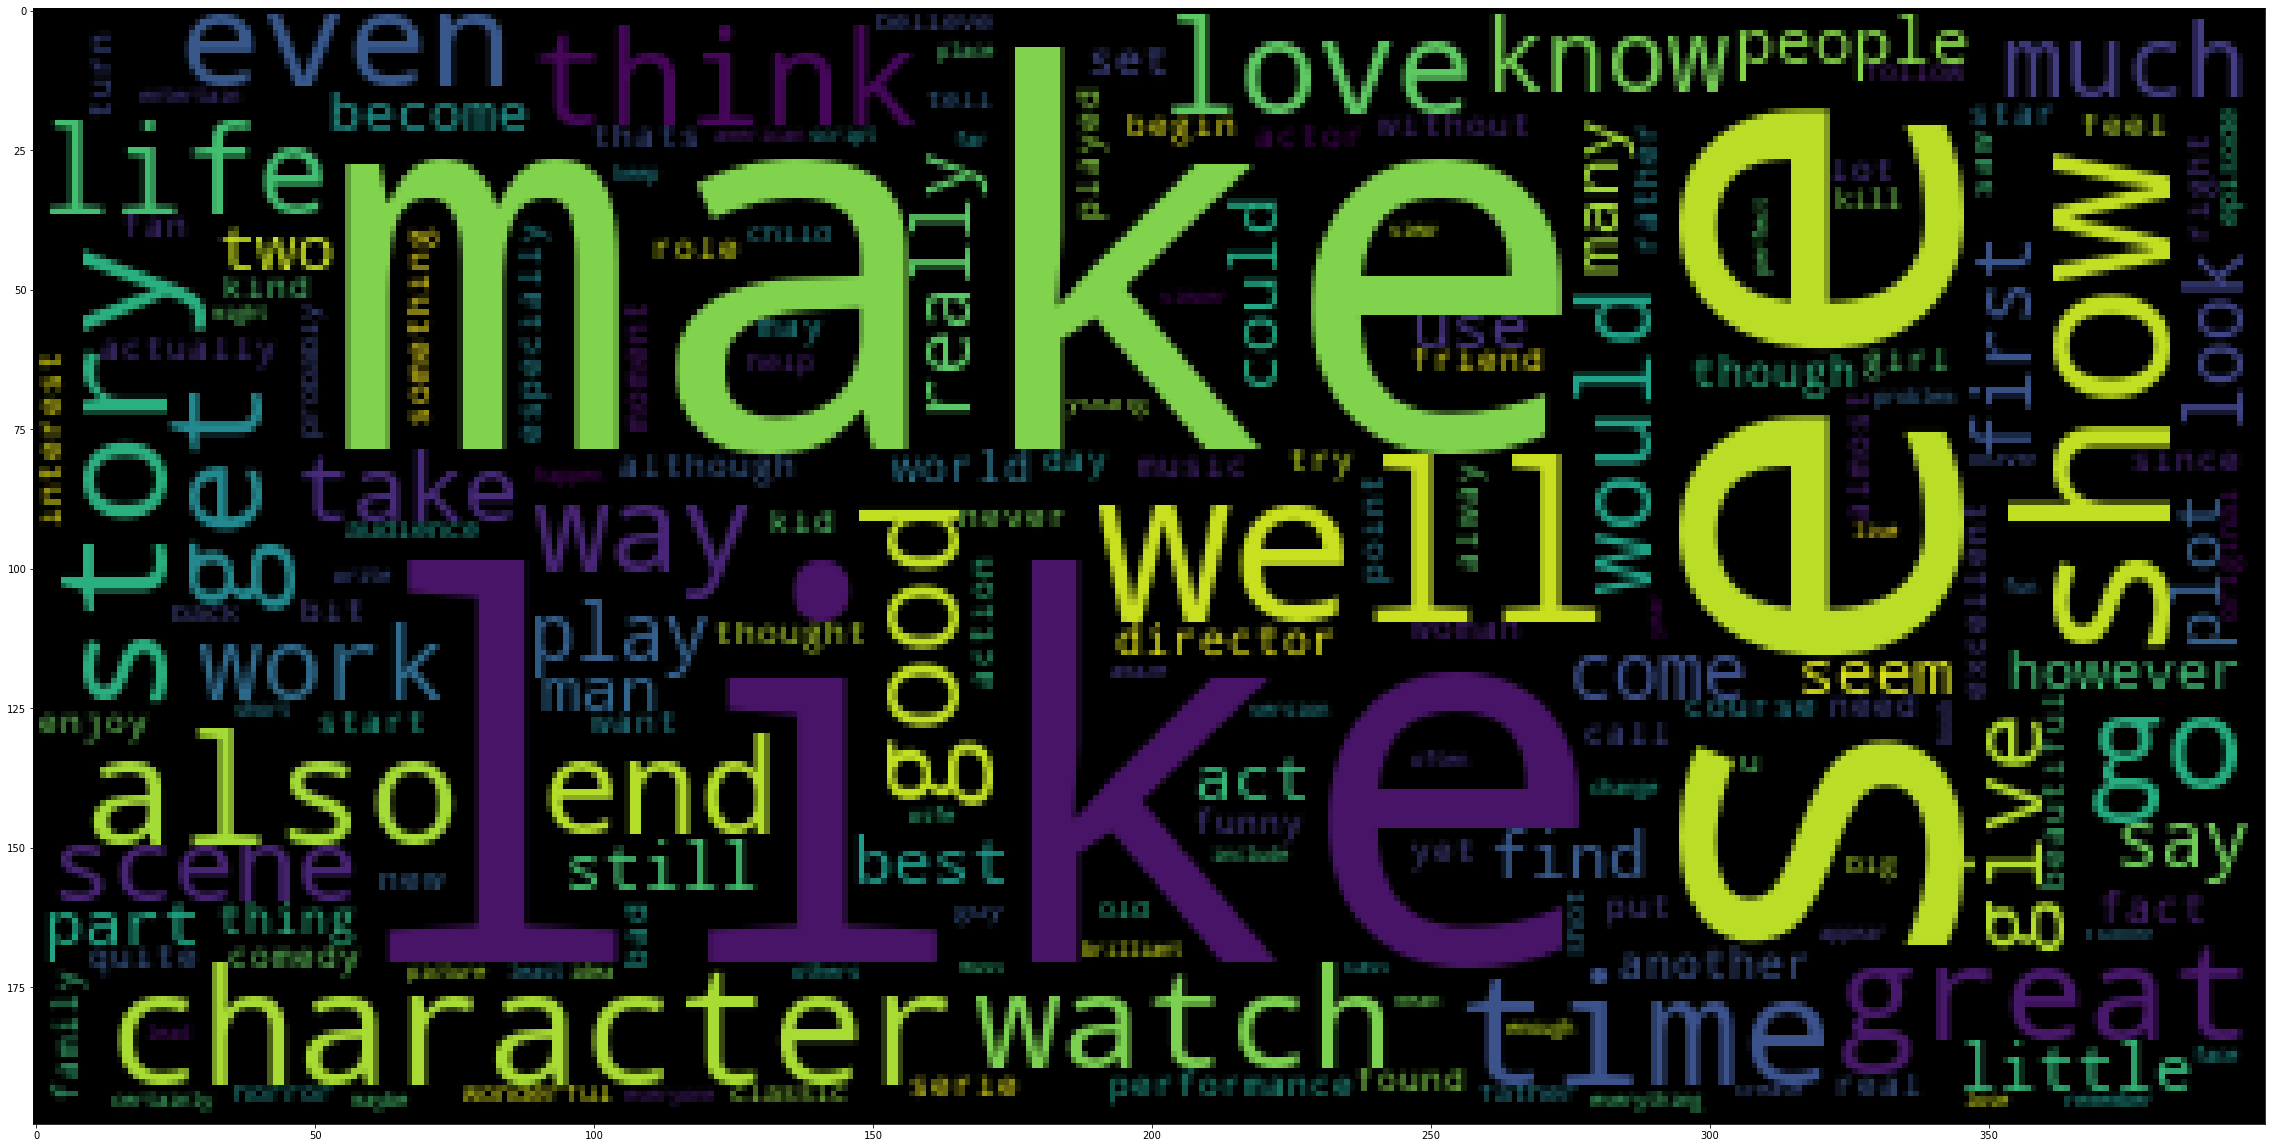

In [19]:
plot_cloud(pos_wordcloud)

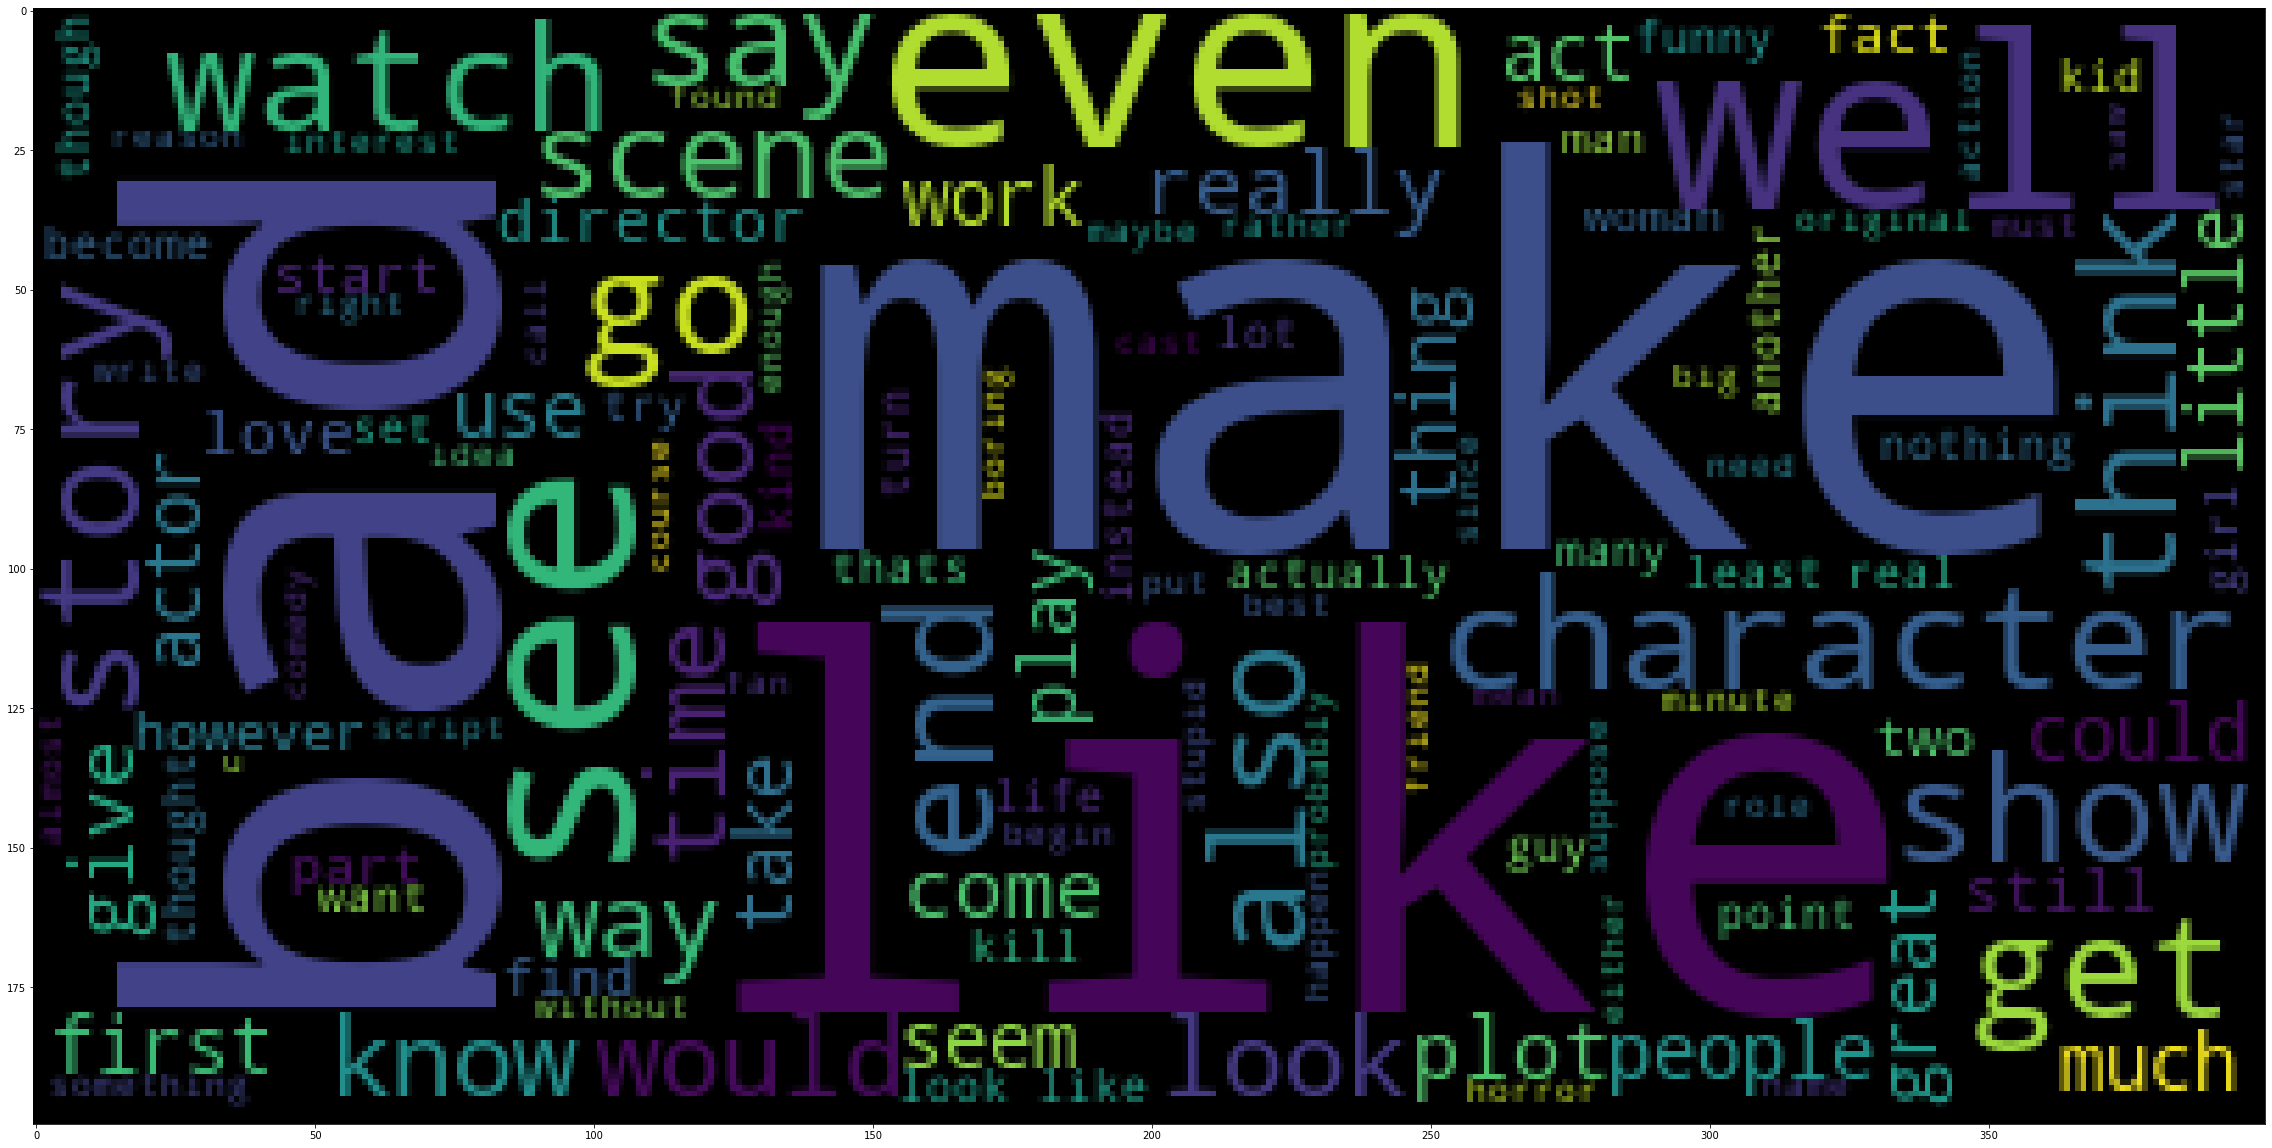

In [18]:
plot_cloud(neg_wordcloud)

In [20]:
#Remove word_count column
train_data = train[['text','label']]
train_data

,text,label
0,grow b . 1965 watch love thunderbird . mate sc...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change t...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work . explores every n...,1
39997,wife watch movie plan visit sicily stromboli s...,0
39998,first watch flatliners amaze . necessary featu...,1


In [21]:
#Create feature vectors using Bag of Words-TfIdf
tfidf_converter = TfidfVectorizer(max_features=1000,min_df=5,max_df=0.7)
x = tfidf_converter.fit_transform(train['text']).toarray()
y = train['label']

In [22]:
y

0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64

In [23]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.10855786,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
print(x.shape)
print(y)

(40000, 1000)
0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64


In [26]:
test_data = preprocess(test)
test_data = lemmatize(test_data)
test_data

,text,label,word_count
0,always write series complete stinkfest jim bel...,0,205
1,1st watch 1272002 3 10dirsteve purcell typical...,0,96
2,movie poorly write direct fell asleep 30 minut...,0,116
3,interest thing miryang secret sunshine actor ....,1,409
4,first read berlin meer expect much . thought r...,0,95
...,...,...,...
4995,kind picture john lassiter would make today ad...,1,55
4996,must see saw whip press screen hilarious . be ...,1,92
4997,nbc ashamed . allow child see this . definitel...,0,64
4998,movie clumsy mishmash various ghoststory suspe...,0,71


In [28]:
x_test_data = test_data[['text']]
y_test_data = test_data[['label']]

In [30]:
x_tst_data = tfidf_converter.transform(x_test_data['text']).toarray()

In [47]:
def models(X_train, Y_train , X_test , Y_test):
    #logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    y_pred1 = log.predict(x_tst_data)
    #Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan' , p=2)
    knn.fit(X_train,Y_train)
    y_pred2 = knn.predict(x_tst_data)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB( )
    gauss.fit(X_train,Y_train)
    y_pred3 = gauss.predict(x_tst_data)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state = 0 )
    tree.fit(X_train,Y_train)
    y_pred4 = tree.predict(x_tst_data)
    
    #RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier( n_estimators=10  , criterion='entropy',random_state = 0)
    forest.fit(X_train,Y_train)
    y_pred5 = forest.predict(x_tst_data)
    
    #print Accuracy
    print('[1] Logistic accuracy ---->>>', accuracy_score(y_test_data,y_pred1))
    print('[1]KNN  accuracy ---->>>', accuracy_score(y_test_data,y_pred2))
    print('[4]Gaussian accuracy ---->>>', accuracy_score(y_test_data,y_pred3))
    print('[5]Decision Tree  accuracy ---->>>', accuracy_score(y_test_data,y_pred4))
    print('[5]Random Forest accuracy ---->>>', accuracy_score(y_test_data,y_pred5))
    
    return log,knn,gauss,tree,forest

In [48]:
model = models(x,y,x_test_data,y_test_data)

[1] Logistic accuracy ---->>> 0.8646
[1]KNN  accuracy ---->>> 0.5308
[4]Gaussian accuracy ---->>> 0.8054
[5]Decision Tree  accuracy ---->>> 0.7158
[5]Random Forest accuracy ---->>> 0.7708


In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(x,y)
y_pred1 = log.predict(x_tst_data)

In [51]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(y_test_data, y_pred1)

In [52]:
a

array([[2133,  362],
       [ 315, 2190]], dtype=int64)

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test_data, y_pred1, average='micro')

0.8646